In [146]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
import os
import numpy as np
import pandas as pd
import json
import cv2 as cv
import glob
import matplotlib.pyplot as plt

In [174]:
%autoreload
import sys
sys.path.insert(0,'../')
from scripts.loader import *
import mytools as tl

## Carga de datos

In [149]:
data_path = os.path.join('..', 'Datasets', 'Interiors')
resp_path = os.path.join(data_path, 'responses')
subj_path = os.path.join(data_path, 'human_scanpaths')

In [150]:
subjs = load_human_scanpaths(subj_path)

In [151]:
responses = pd.read_csv(os.path.join(resp_path, 'responses_data.csv')).set_index(['subj_id','image'])
responses.loc[22,'grayscale_11_opensource.jpg']

subj                          fac
response_x                    829
response_y                   1119
response_size                  11
response_time_click      2.366613
response_time_circle    24.016633
Name: (22, grayscale_11_opensource.jpg), dtype: object

## Agregar las respuestas y chequeo de datos

In [152]:
# add responses
tl.add_responses(subj_path, resp_path)

subj_id: 41
file:  ../Datasets/Interiors/human_scanpaths/subj41_scanpaths.json
subj_id: 48
file:  ../Datasets/Interiors/human_scanpaths/subj48_scanpaths.json
subj_id: 51
file:  ../Datasets/Interiors/human_scanpaths/subj51_scanpaths.json
subj_id: 19
file:  ../Datasets/Interiors/human_scanpaths/subj19_scanpaths.json
subj_id: 22
file:  ../Datasets/Interiors/human_scanpaths/subj22_scanpaths.json
subj_id: 12
file:  ../Datasets/Interiors/human_scanpaths/subj12_scanpaths.json
subj_id: 20
file:  ../Datasets/Interiors/human_scanpaths/subj20_scanpaths.json
subj_id: 10
file:  ../Datasets/Interiors/human_scanpaths/subj10_scanpaths.json
subj_id: 17
file:  ../Datasets/Interiors/human_scanpaths/subj17_scanpaths.json
subj_id: 36
file:  ../Datasets/Interiors/human_scanpaths/subj36_scanpaths.json
subj_id: 42
file:  ../Datasets/Interiors/human_scanpaths/subj42_scanpaths.json
subj_id: 21
file:  ../Datasets/Interiors/human_scanpaths/subj21_scanpaths.json
subj_id: 23
file:  ../Datasets/Interiors/human_scanp

In [153]:
# carga de los sujetos con las respuestas almacenadas
subjs_response = load_human_scanpaths(os.path.join(resp_path, 'human_scanpaths'))
subjs_response[1]['grayscale_11_opensource.jpg']

{'subject': '01',
 'dataset': 'Interiors Dataset',
 'image_height': 768,
 'image_width': 1024,
 'screen_height': 960,
 'screen_width': 1280,
 'receptive_height': 32,
 'receptive_width': 32,
 'target_found': False,
 'target_bbox': [559, 228, 631, 300],
 'X': [623.5, 507.6, 367.4, 385.7, 656.6, 401.7, 349.8, 327.0],
 'Y': [758.9, 434.0, 338.6, 509.70000000000005, 407.4, 588.3, 557.3, 551.1],
 'T': [1449, 130, 244, 296, 396, 327, 360, 539],
 'target_object': 'TBD',
 'max_fixations': 13,
 'subject_name': 'AFR',
 'initial_fixation_row': 754,
 'initial_fixation_column': 585,
 'response_x': 463.0,
 'response_y': 258.0,
 'response_size': 17,
 'response_click': 9.40012257278431,
 'response_circle': 18.2170030085836,
 'distance_to_target': 132.13629327327143,
 'target_found_response': False,
 'delta_time_response': 8.81688043579929}

In [154]:
# algunos chequeos
tl.dimensions_check_scapaths(subj_path)

Dimesions are OK, X: columns, Y: rows


In [155]:
# dataframe de relevancia para explorar las respuestas
responses_data = tl.get_responses_features(subjs_response)
responses_data.head()

,subj,img,max_fixations,target_found,target_found_response,response_size,distance_to_target,delta_time_response,response_x,response_y
0,41,grayscale_11_opensource.jpg,13,False,False,29,311.313347,49.599536,415.0,518.0
1,41,grayscale_18_housebeautiful.jpg,9,False,False,47,289.587638,9.666707,506.0,552.0
2,41,grayscale_100_oliva.jpg,5,True,False,19,231.019480,5.633140,186.0,746.0
3,41,grayscale_17_oliva.jpg,3,False,False,35,342.947518,4.266648,284.0,465.0
4,41,grayscale_16_housebeautiful.jpg,3,False,False,19,601.838018,2.900187,410.0,794.0


In [156]:
subjs_response[41]['grayscale_100_oliva.jpg']

{'subject': '41',
 'dataset': 'Interiors Dataset',
 'image_height': 768,
 'image_width': 1024,
 'screen_height': 960,
 'screen_width': 1280,
 'receptive_height': 32,
 'receptive_width': 32,
 'target_found': True,
 'target_bbox': [381, 713, 453, 785],
 'X': [398.5, 493.4, 758.7],
 'Y': [365.1, 374.5, 417.6],
 'T': [1818, 233, 222],
 'target_object': 'potted plant',
 'max_fixations': 5,
 'subject_name': 'mar',
 'initial_fixation_row': 339,
 'initial_fixation_column': 400,
 'response_x': 186.0,
 'response_y': 746.0,
 'response_size': 19,
 'response_click': 1.88357193919364,
 'response_circle': 7.51671208883636,
 'distance_to_target': 231.01947969814148,
 'target_found_response': False,
 'delta_time_response': 5.63314014964272}

In [157]:
subj = 41
image_name = 'grayscale_100_oliva.jpg' 
subjs[subj][image_name]['target_bbox'][:2]

[381, 713]

In [158]:
trials_data = load_trials_properties(os.path.join(subj_path,'..', 'trials_properties.json'))
trials_data = pd.DataFrame(trials_data).set_index('image')
trials_data.head()

,target,dataset,target_matched_row,target_matched_column,target_height,target_width,image_height,image_width,initial_fixation_row,initial_fixation_column,target_object
image,,,,,,,,,,,
grayscale_1_housebeautiful.jpg,grayscale_1_housebeautiful_template_2.jpg,Interiors Dataset,155,130,72,72,768,1024,113,515,clock
grayscale_1_kitchen.jpg,grayscale_1_kitchen_template_1.jpg,Interiors Dataset,270,855,72,72,768,1024,620,718,bowl
grayscale_1_oliva.jpg,grayscale_1_oliva_template_1.jpg,Interiors Dataset,605,106,72,72,768,1024,718,492,cup
grayscale_1_opensource.jpg,grayscale_1_opensource_template_1.jpg,Interiors Dataset,376,700,72,72,768,1024,657,997,TBD
grayscale_2_housebeautiful.jpg,grayscale_2_housebeautiful_template_3.jpg,Interiors Dataset,499,447,72,72,768,1024,471,835,bowl


In [159]:
trials_data.loc[image_name, 'initial_fixation_row']

339

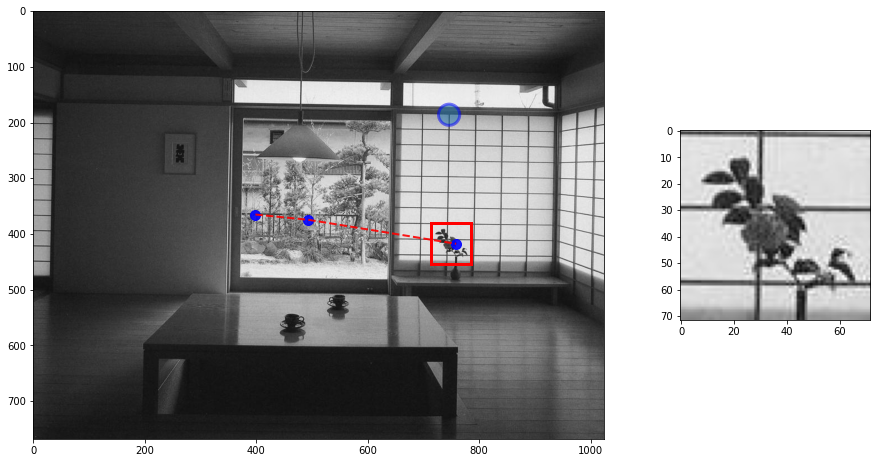

In [160]:
from matplotlib.patches import Rectangle, Circle, FancyArrowPatch

subj = 41
image_name = 'grayscale_100_oliva.jpg' 

ty, tx = subjs_response[subj][image_name]['target_bbox'][:2]
ry, rx = subjs_response[subj][image_name]['response_x'], subjs_response[subj][image_name]['response_y']
r = subjs_response[subj][image_name]['response_size']
scanpath_x = np.array(subjs_response[subj][image_name]['X'])
scanpath_y = np.array(subjs_response[subj][image_name]['Y'])
#print(scanpath_x[0].dtype)

img = cv.imread(os.path.join(data_path, 'images',image_name))
tmp_files = glob.glob(os.path.join(data_path, 'templates', image_name[:-4] + '*'))
tmp = cv.imread(tmp_files[0])

fig, ax = plt.subplots(1,2, figsize=(15,10), gridspec_kw={'width_ratios': [3, 1]})
#fig, ax = plt.subplots(1,1, figsize=(15,10))
#print(np.array(ax).shape)
ax[0].imshow(img, cmap='gray');
ax[0].add_patch(Rectangle((tx,ty), tmp.shape[1], tmp.shape[0], fill=False, edgecolor='red', linewidth=3))
ax[0].add_patch(Circle((rx,ry), r, fill=True, edgecolor='blue', linewidth=3, alpha=0.5))
for n, (x, y) in enumerate(zip(scanpath_x, scanpath_y)):
    ax[0].plot(x, y, 'bo',alpha=0.9, markersize=10)
    #print(n)
    if n != 0:
        anterior = np.array([x_prev, y_prev])
        actual = np.array([x, y])
        #print(anterior.shape, actual.shape)
        #print((actual[1] - anterior[1]))
        #dx = x - anterior[0]
        #dy = y - anterior[1]
        #arr = FancyArrowPatch((x_prev, y_prev), (dx, dy), alpha=0.9, color='red')
        #ax[0].add_patch(arr)
        #ax[0].arrow(anterior, actual, dx, dx,
        #           head_width=3, length_includes_head=True)
        ax[0].plot([x_prev, x], [y_prev, y], 'r--', alpha=0.9, linewidth=2)
    x_prev, y_prev = x, y

ax[1].imshow(tmp, cmap='gray');

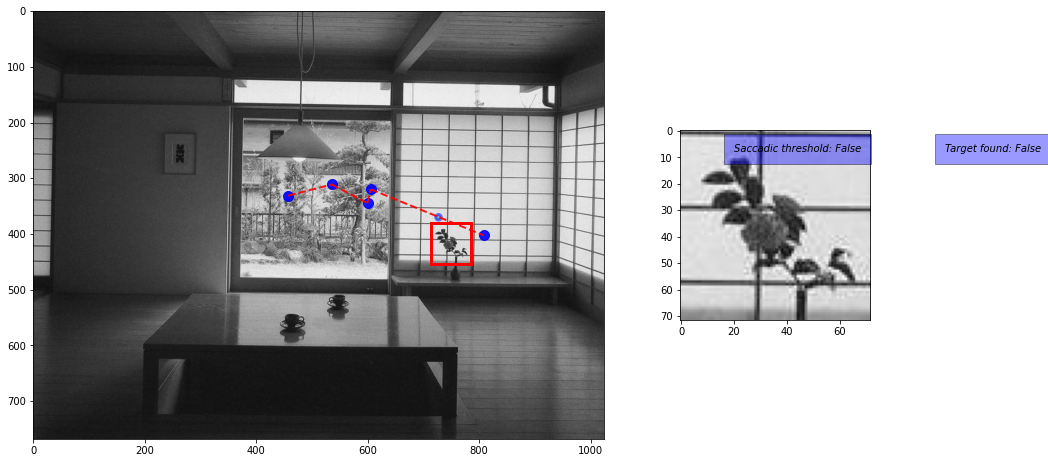

In [175]:
tl.plot_trial_subject_response(subj=21, 
                               image_name=image_name,
                               data_path=data_path,
                               resp_path=resp_path,
                               y_correction = True,
                               show_scanpath=True)

## Chequeos de target found en respuesta subjetiva

In [19]:
responses_data.target_found.sum(), responses_data.target_found_response.sum() 

(3759, 3923)

In [20]:
# sanity check
responses_data[(responses_data.target_found) & ~(responses_data.target_found_response)].shape

(1115, 10)

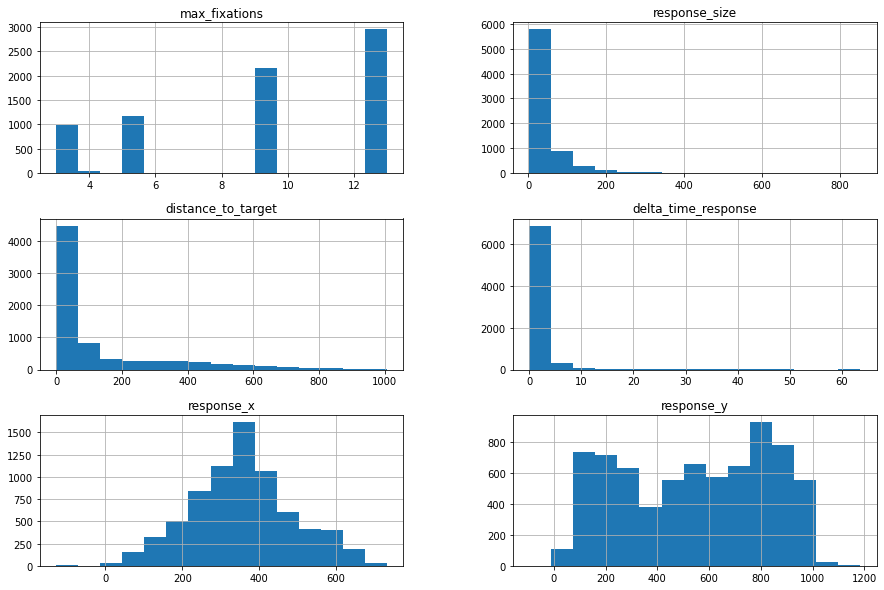

In [21]:
responses_data.loc[:,responses_data.columns!='subj'].hist(figsize=(15,10), bins=15);